In [3]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt

In [4]:
pre_covid_stations = gpd.read_file('../data/curated/stations/stations_precovid.gpkg')
post_covid_stations = gpd.read_file('../data/curated/stations/stations_postcovid.gpkg')

pre_covid_mean_daily_train_demand = pd.read_csv('../data/curated/train_demand/mean_daily_trains_demand_pre_covid.csv')
post_covid_mean_daily_train_demand = pd.read_csv('../data/curated/train_demand/mean_daily_trains_demand_post_covid.csv')

In [5]:
# join dataset
pre_covid_mean_daily_train_demand = pre_covid_mean_daily_train_demand.merge(pre_covid_stations[['Station_Name', 'geometry']], on = 'Station_Name')
post_covid_mean_daily_train_demand = post_covid_mean_daily_train_demand.merge(post_covid_stations[['Station_Name', 'geometry']], on = 'Station_Name')

In [7]:
pre_covid_mean_daily_train_demand[['Passenger_Boardings', 'Passenger_Alightings', 'Total_Demand', 'log_Total_Demand', 'log_Passenger_Boardings', 'log_Passenger_Alightings']].describe()

,Passenger_Boardings,Passenger_Alightings,Total_Demand,log_Total_Demand,log_Passenger_Boardings,log_Passenger_Alightings
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,3558.282429,3559.582278,7117.864707,7.876762,7.179887,7.182119
std,12093.584621,11932.323613,24020.832480,1.430382,1.442777,1.432344
min,0.614754,1.250000,1.864754,0.623129,-0.486533,0.223144
25%,851.510272,820.180064,1663.409091,7.416623,6.747010,6.709521
50%,1506.592476,1520.096237,3050.457440,8.023009,7.317517,7.326529
75%,2436.855799,2509.783610,4948.622312,8.506826,7.798464,7.827951
max,152285.245902,151615.045537,303900.291439,12.624455,11.933511,11.929100


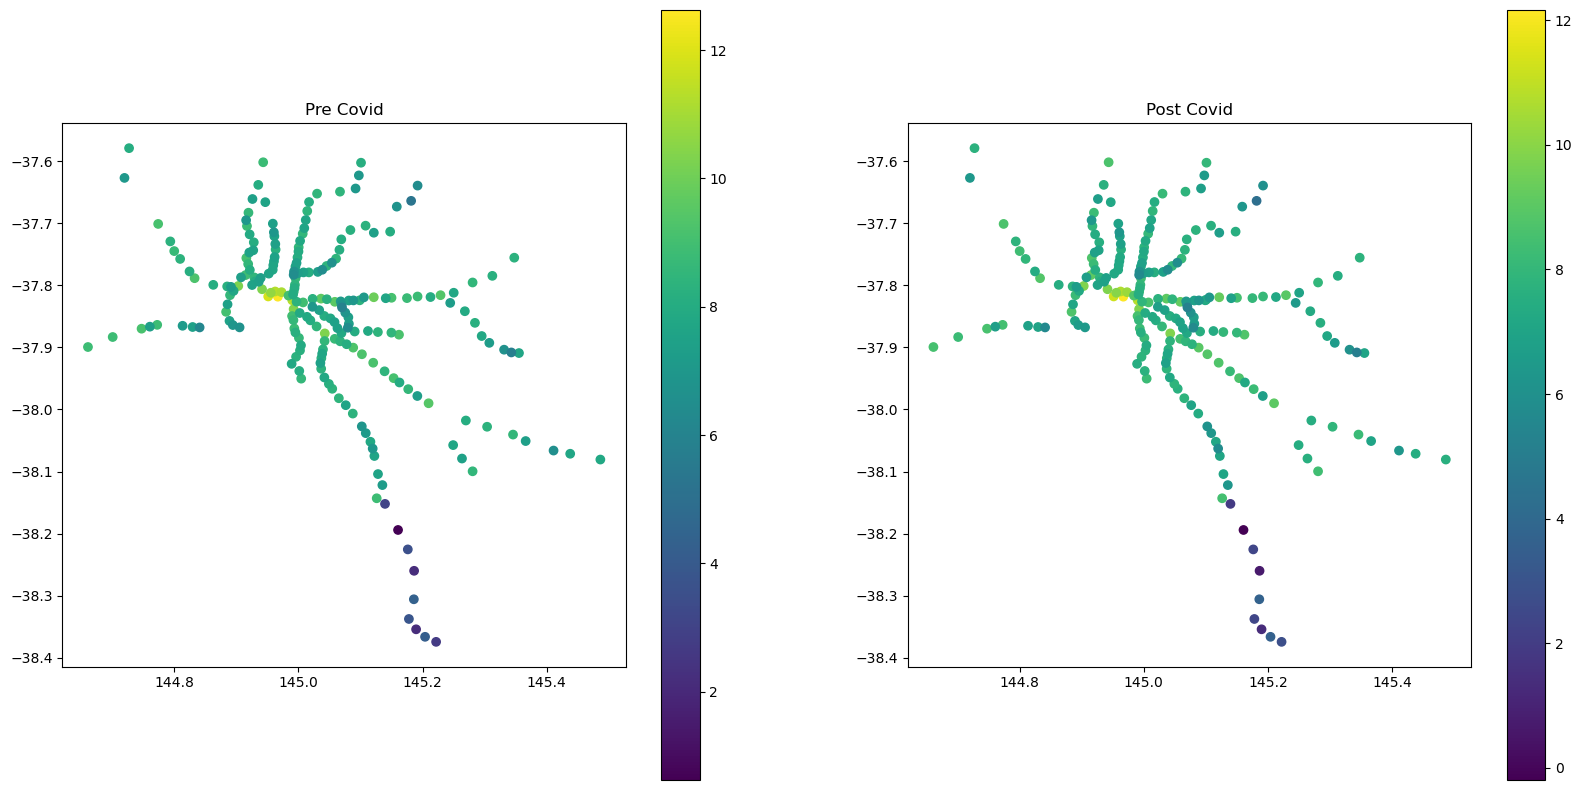

In [9]:
# plot total demand
pre_covid_mean_daily_train_demand['geometry'] = pre_covid_mean_daily_train_demand['geometry'].apply(lambda x: Point(x.x, x.y))
post_covid_mean_daily_train_demand['geometry'] = post_covid_mean_daily_train_demand['geometry'].apply(lambda x: Point(x.x, x.y))

pre_covid_mean_daily_train_demand = gpd.GeoDataFrame(pre_covid_mean_daily_train_demand, geometry='geometry')
post_covid_mean_daily_train_demand = gpd.GeoDataFrame(post_covid_mean_daily_train_demand, geometry='geometry')

# plot
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
pre_covid_mean_daily_train_demand.plot(column='log_Total_Demand', ax=ax[0], legend=True)
post_covid_mean_daily_train_demand.plot(column='log_Total_Demand', ax=ax[1], legend=True)
ax[0].set_title('Pre Covid')
ax[1].set_title('Post Covid')
plt.show()

In [12]:
pre_covid_mean_daily_train_demand.head()


,Station_Name,Passenger_Boardings,Passenger_Alightings,Total_Demand,log_Passenger_Boardings,log_Passenger_Alightings,log_Total_Demand,geometry
0,Flinders Street,152285.245902,151615.045537,303900.291439,11.933511,11.929100,12.624455,POINT (144.96696 -37.81831)
1,Southern Cross,71872.969035,67736.393443,139609.362477,11.182656,11.123379,11.846604,POINT (144.95141 -37.81794)
2,Melbourne Central,41674.314442,37518.318099,79192.632541,10.637640,10.532585,11.279639,POINT (144.96259 -37.80994)
3,Richmond,39389.234973,39163.260474,78552.495446,10.581248,10.575494,11.271522,POINT (144.99016 -37.82407)
4,Parliament,32626.234004,35007.659963,67633.893967,10.392872,10.463322,11.121865,POINT (144.97291 -37.81105)


In [13]:
post_covid_mean_daily_train_demand.head()

,Station_Name,Passenger_Boardings,Passenger_Alightings,Total_Demand,log_Passenger_Boardings,log_Passenger_Alightings,log_Total_Demand,geometry
0,Flinders Street,97580.842491,94137.875458,191718.717949,11.488436,11.452516,12.163785,POINT (144.96696 -37.81831)
1,Southern Cross,38376.465201,35768.589744,74145.054945,10.555200,10.484825,11.213779,POINT (144.95141 -37.81794)
2,Richmond,24840.695971,24575.659341,49416.355311,10.120239,10.109512,10.808037,POINT (144.99016 -37.82407)
3,Melbourne Central,23284.484053,19963.208255,43247.692308,10.055542,9.901646,10.674699,POINT (144.96259 -37.80994)
4,Parliament,14789.606004,15191.257036,29980.863039,9.601680,9.628475,10.308315,POINT (144.97291 -37.81105)


In [10]:
pre_covid_mean_daily_train_demand.to_file('../data/curated/train_demand/mean_daily_trains_demand_pre_covid.gpkg', driver='GPKG')
post_covid_mean_daily_train_demand.to_file('../data/curated/train_demand/mean_daily_trains_demand_post_covid.gpkg', driver='GPKG')